# Spectral embedding of the results from SVD

In [5]:
#import tensorflow as tf
import nltk
from os import listdir
from os.path import isfile, join
from nltk.corpus import stopwords
import re
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

In [6]:
with open('../RemarksAndStatement/name_candidates_speech.txt', 'r') as f:
    list_name_candidates = f.read()
    list_name_candidates = list_name_candidates.split('\n')[0:-1]
    
with open('../RemarksAndStatement/id_candidates_speech.txt', 'r') as f:
    list_id_candidates = f.read()
    list_id_candidates = list_id_candidates.split('\n')[0:-1]
    
path_text_files = '../RemarksAndStatement/text_files_with_punctuation/'
path_files = [f for f in listdir(path_text_files) if isfile(join(path_text_files, f))]

text_files = list()
for current_path_file in path_files:
    with open(path_text_files+'/'+current_path_file, 'r') as f:
        current_file = f.read()
        current_file = current_file.split(' ')
        for k in range(len(current_file)):
            current_file[k] = re.sub("[^a-zA-Z]","", current_file[k])
        #current_file = [word.replace('\n','') for word in current_file if ((word not in stopwords.words('english')) \
        #                                                  and (word!=''))]
        text = ''
        for k in range(len(current_file)):
            if (k==0):
                text += current_file[k]
            else:
                text += ' ' + current_file[k]
        text_files.append(text)

In [15]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.9, min_df=0.1,stop_words='english',decode_error='ignore')
tfidf_matrix = tfidf_vectorizer.fit_transform(text_files)
#tfidf_vectorizer = CountVectorizer(max_df=0.9, min_df=0.1,stop_words='english',decode_error='ignore')
#tfidf_matrix = tfidf_vectorizer.fit_transform(text_files)

In [16]:
print tfidf_matrix.shape
print len(list_id_candidates)

(433, 251)
433


In [17]:
U, s, V = np.linalg.svd(tfidf_matrix.todense(), full_matrices=True)

[  3.90842952e+00   1.27405640e-01   7.56249282e-01   1.33541824e-01
   1.89489738e-01   5.23916340e-02   7.08437540e-02   6.48582024e-02
   1.25457971e-01   1.02245340e-01   7.41779986e-02   3.56709908e-02
   6.65851122e-02   2.74477910e-02   3.43575450e-02   3.22300884e-02
   2.82626476e-02   3.24780975e-02   1.64559092e-02   6.93955054e-02
   2.75248353e-03   2.40390036e-02   3.01972202e-02   1.64160254e-02
   2.27679933e-02   1.89647220e-02   2.23125725e-02   1.23907716e-02
   9.43233854e-03   2.26605822e-02   3.34716470e-02   1.57140179e-02
   2.02058000e-02   2.42536044e-02   8.79649287e-03   1.21401603e-02
   1.01754359e-03   1.84330077e-02   1.11257827e-02   1.02361458e-02
   1.51979622e-02   3.67067738e-03   2.91410667e-02   1.03591760e-02
   1.57203618e-02   1.29967041e-02   1.22469776e-02   1.92840938e-02
   3.70644591e-03   1.77464688e-02]


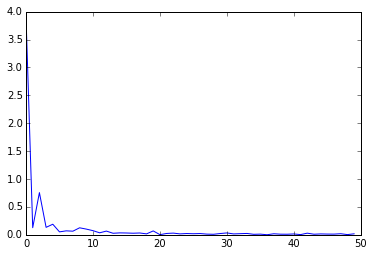

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(s[0:50] - s[1:51])
print (s[0:50] - s[1:51]) 


#the first 10 eigenvalues shows significantly variations all the other not so much, I decide to take only the first 10
#columns of U for this

In [20]:
from sklearn.manifold import TSNE

U_selected = U[:,0:25]
np.set_printoptions(threshold='nan')
print np.sum(U_selected)
model = TSNE(n_components=2, random_state=0)
tsne_xy=model.fit_transform(U_selected)

-22.6841732292


In [23]:
np.savetxt("tsne_xy",tsne_xy)